#  Basic classification: Classify images of clothing

## Importing Libraries & modules

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(f"TF Version: {tf.__version__}")

TF Version: 2.9.1


## Import the Fashion MNIST dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

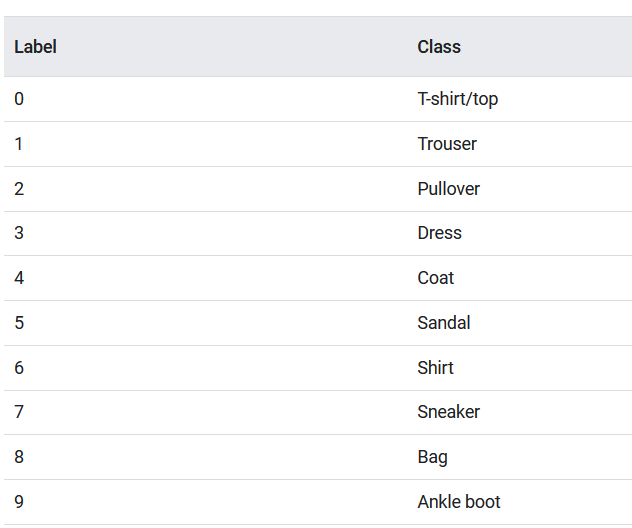

In [3]:
# Defining Classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

In [4]:
# 60,000 train images of 28 x 28 pixels
train_images.shape

(60000, 28, 28)

In [5]:
# No of labels
len(train_labels)

60000

In [6]:
# 10,000 test images of 28 x 28 pixels
test_images.shape

(10000, 28, 28)

## Preprocess the data

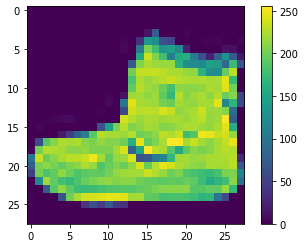

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

### Scalling images in [0,1]

In [8]:
train_images = train_images / 255.0

test_images = test_images / 255.0


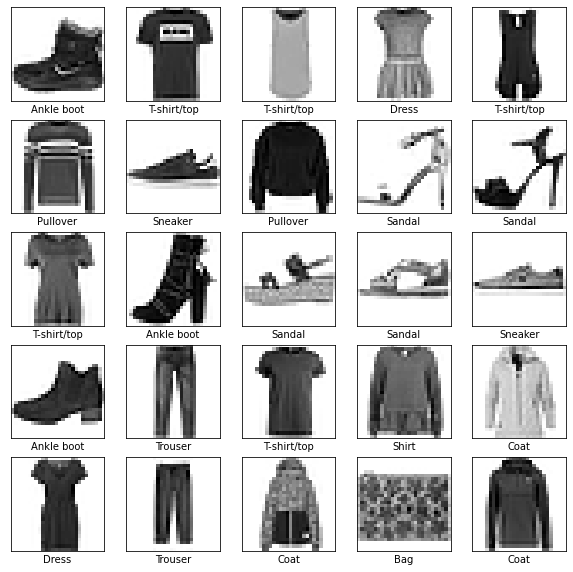

In [9]:
# Plotting first 25 trainng images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


## Build the model

### Set up the layers

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

### Compile the model

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


### Train the model

In [12]:
r = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4967 - accuracy: 0.8241
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3746 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3368 - accuracy: 0.8782
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3135 - accuracy: 0.8860
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2942 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2807 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2681 - accuracy: 0.9009
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2575 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2462 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 10s 6ms/step - lo

### Evaluate accuracy

In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', round(test_acc*100,5),"%")

313/313 - 1s - loss: 0.3578 - accuracy: 0.8730 - 1s/epoch - 3ms/step

Test accuracy: 87.3 %


**Test Accuracy is less than Train accuracy, so there might be overfitting issue**

## Make predictions

In [14]:
#  Attach a softmax layer 
# to convert the model's linear outputs—logits—to probabilities,
# which should be easier to interpret

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [15]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 793us/step


In [16]:
np.argmax(predictions[0])

9

In [17]:
test_labels[0]

9

In [18]:
### Verifying Prediction

In [19]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


#### Predicting Random Image

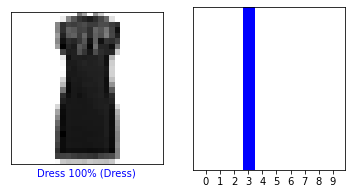

In [20]:
import numpy as np
img_random = np.random.randint(0,len(test_labels))

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(img_random, predictions[img_random], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(img_random, predictions[img_random],  test_labels)
plt.show()


## Tensorboard: Visualization toolkit for TF

In [21]:
import datetime

In [22]:
%load_ext tensorboard

In [23]:
log_folder = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [24]:
%reload_ext tensorboard

In [25]:
# Removes old logs
#!rm -rf /logs/

### TensorBoard callback

In [26]:
from tensorflow.keras.callbacks import TensorBoard

In [27]:
callbacks = [TensorBoard(log_dir=log_folder,
                         histogram_freq=1,
                         write_graph=True,
                         write_images=True,
                         update_freq='epoch',
                         profile_batch=2,
                         embeddings_freq=1)]

In [28]:
model.fit(train_images, train_labels,
          epochs=10,
          validation_split=0.2,
          callbacks=callbacks)

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2313 - accuracy: 0.9132 - val_loss: 0.2344 - val_accuracy: 0.9142
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2212 - accuracy: 0.9165 - val_loss: 0.2475 - val_accuracy: 0.9045
Epoch 3/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2129 - accuracy: 0.9201 - val_loss: 0.2339 - val_accuracy: 0.9132
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2060 - accuracy: 0.9218 - val_loss: 0.2330 - val_accuracy: 0.9141
Epoch 5/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2003 - accuracy: 0.9255 - val_loss: 0.2538 - val_accuracy: 0.9082
Epoch 6/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1937 - accuracy: 0.9271 - val_loss: 0.2553 - val_accuracy: 0.9096
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1876 - accuracy: 0.9299 - val_loss: 0.2598 - val_accur

In [29]:
%tensorboard --logdir={log_folder}